# Musical Tuning

In order to understand why we generally use 12 qually spaced notes in musical scales, I put together some visualisations which show the notes/intervals against dissonance/consonance curves. 

It's generally known that the most consonant intervals in music are where the difference in frequencies of 2 notes played together can be expressed as simple ratios. e.g. An octave is a ratio of 2/1, which means the root note with frequency of say 440Hz is played at the same time as a note with double the frequency, 880Hz. A perfect fifth is the ratio of 3/2 which puts the note frequency at 660Hz.

Instead of using frequency ratios it's easier to visualize this on a linear scale where the root not is a 0 and the octave is at 1. Then 2 octaves would be 2. Ratios can be converted using the base 2 logarithm, e.g the perfect fifth: log2(3/2) = 0.585

## Dissonance Curve

The curve below shows the dissonance of 2 sine waves played at increasing frequency intervals. The curve is based on experimental results by Plomp and Levelt in the paper [Tonal Consonance and Critical Bandwidth](https://www.mpi.nl/world/materials/publications/levelt/Plomp_Levelt_Tonal_1965.pdf). It shows that consonance is greatest when the 2 sine waves are at the same frequency. As the frequeny interval increases it become more dissonant, after a level of maximum dissonance it then drops off again to become gradually more consonant.

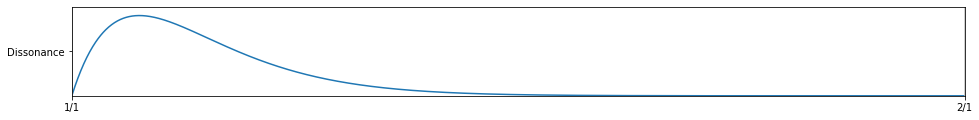

In [2]:
import tuning as tuning
import tuningplot as tuningplot
%matplotlib inline

plot = tuningplot.TuningPlot('h', 16)
plot.plotDissonance([1], 1)
plot.plotRatios([(1, 1), (2, 1)])
plot.plot()

## Harmonic Series

Most real word musical sounds comprise of frequencies in the harmonic series. That is they have frequencies that are an integer multiple of a fundamental frequency. 

A dissonance curve can be calculated by adding up all the dissonances between pairs of partials in a particular sound. See [Relating Tuning and Timbre](https://sethares.engr.wisc.edu/consemi.html) by William Sethares.

For instance the following curve is plotted from a sound with the first 6 harmonics:

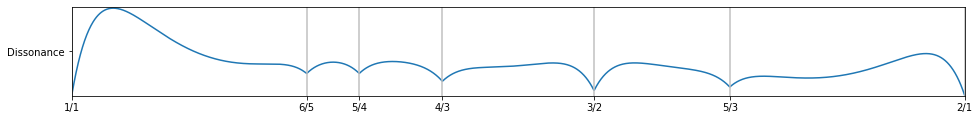

In [3]:
plot = tuningplot.TuningPlot('h', 16)
plot.plotDissonance([1, 2, 3, 4, 5, 6])
plot.plotRatios([(1, 1), (2, 1), (3, 2), (4, 3), (5, 3), (5, 4), (6, 5)])
plot.plot()

You can see from this that the most consonant intervals are representated by simple ratios, which are also marked on the graph.

This is how the curve changes when more partials are added:

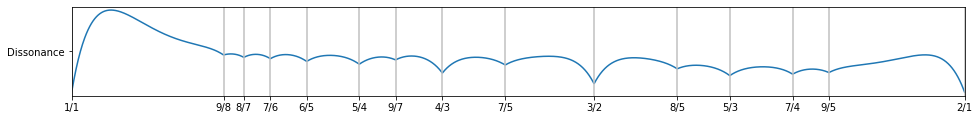

In [4]:
plot = tuningplot.TuningPlot('h', 16)
plot.plotDissonance([1, 2, 3, 4, 5, 6, 7, 8, 9], 5.5)
plot.plotRatios([(1, 1), (2, 1), (3, 2), (4, 3), (5, 3), (5, 4), (6, 5), (7, 4), (7, 5), (7, 6), (8,5), (8,7), (9, 5), (9, 7), (9, 8)])
plot.plot()

The most common tuning in western music is the *12 tone equal temperament* tuning, which divides the octave into 12 equal intervals. Being equaly divided adds the convenience that music can be easily transposed on an instrument while sounding the same.

The following graph shows these 12 intervals against the dissonance curve:

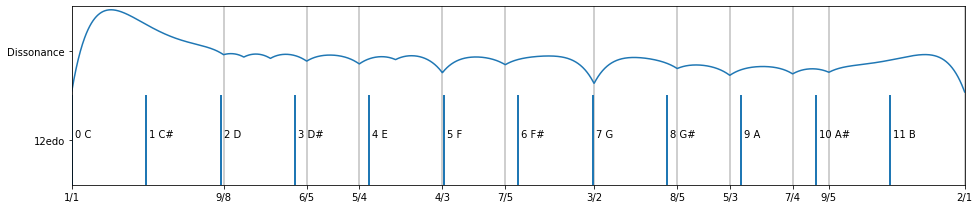

In [5]:
tuning_12edo = tuning.createEqualDivisionTuning("12edo", 12, 1, ['0 C','1 C#','2 D','3 D#','4 E','5 F','6 F#','7 G','8 G#','9 A','10 A#','11 B'])

plot = tuningplot.TuningPlot('h', 16)
plot.plotRatios([(1, 1), (2, 1), (3, 2), (4, 3), (5, 3), (5, 4), (6, 5), (7, 4), (7, 5), (8,5), (9, 8), (9, 5)])
plot.plotDissonance([1, 2, 3, 4, 5, 6, 7, 8, 9], 5.5)
plot.plotTuning(tuning_12edo)
plot.plot()

This scale matches the most consonant intervals, the Perfect Fifth (3/2) and the Perfect Fourth (4/3) nearly perfectly, which makes it quite useful, but other consonant intervals are slightly off.

There are other equal divisions of the octave that can be used to match closer to other intervals.

A scale with 19 equal divisions deviates slight from 3/2 and 4/3 but matches nearly perfect with 6/5, 5/3 and more closely to 5/4, 8/5 and also has a note near 9/7 which has no close equavalent in 12edo.

Of course, if we used 19edo to make music, standard concepts from 12edo like the heptatonic scales and major and minor chords, will need to replaced with new concepts. The easiest thing to do would be to translate the notes to the nearest notes in 19edo, but it should also be possible to experiment with new types of chord from these more consonant intervals.

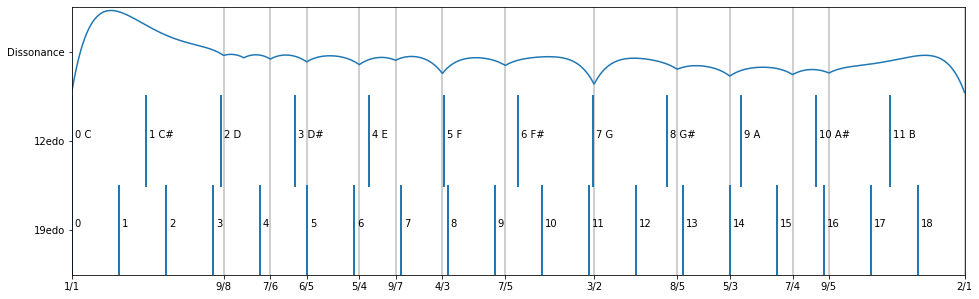

In [6]:
tuning_19edo = tuning.createEqualDivisionTuning("19edo", 19, 1)

plot = tuningplot.TuningPlot('h', 16)
plot.plotRatios([(1, 1), (2, 1), (3, 2), (4, 3), (5, 3), (5, 4), (6, 5), (7, 4), (7, 5), (7, 6), (8,5), (9, 8), (9, 7), (9, 5)])
plot.plotDissonance([1, 2, 3, 4, 5, 6, 7, 8, 9], 5.5)
plot.plotTuning(tuning_12edo)
plot.plotTuning(tuning_19edo)
plot.plot()

### Just Intonation

Just intonations throws away the requirement for equaly spaced notes infavour of more consonant intervals. Tuning physical instruments to a just intonations limits the ability to change key and transpose music, but electronically generated music doesn't have to have this limitation as it has the potential to be transposed out of scale.

There are many ways of creating just scales, some prefer simpler ratios over trying to match 12edo closely, others prefer larger ratios in favour of getting closer to 12edo. 

A couple of examples are shown below, but there are many more examples on the Wikipedia page - [Just intonation](https://en.wikipedia.org/wiki/Just_intonation).

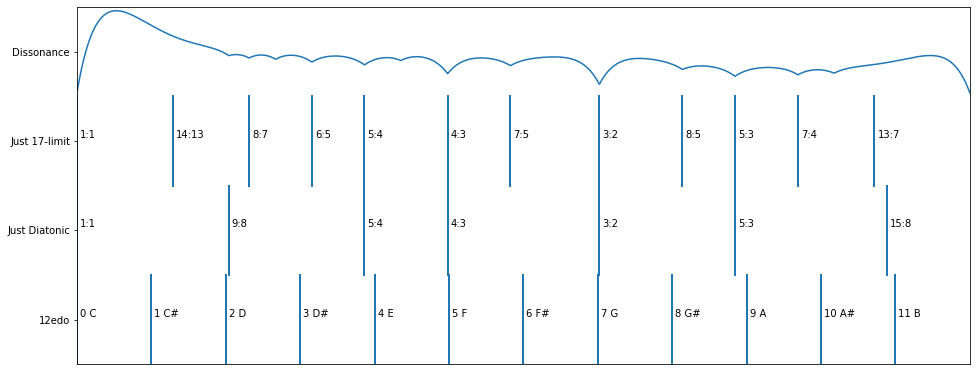

In [7]:
tuning_justdiatonic = tuning.Tuning("Just Diatonic", [])
tuning_justdiatonic.addIntervalRatio(1, "1:1")
tuning_justdiatonic.addIntervalRatio(9/8, "9:8")
tuning_justdiatonic.addIntervalRatio(5/4, "5:4")
tuning_justdiatonic.addIntervalRatio(4/3, "4:3")
tuning_justdiatonic.addIntervalRatio(3/2, "3:2")
tuning_justdiatonic.addIntervalRatio(5/3, "5:3")
tuning_justdiatonic.addIntervalRatio(15/8, "15:8")

tuning_just17limit = tuning.Tuning("Just 17-limit", [])
tuning_just17limit.addIntervalRatio(1, "1:1")
tuning_just17limit.addIntervalRatio(8/7, "8:7")
tuning_just17limit.addIntervalRatio(5/4, "5:4")
tuning_just17limit.addIntervalRatio(4/3, "4:3")
tuning_just17limit.addIntervalRatio(3/2, "3:2")
tuning_just17limit.addIntervalRatio(5/3, "5:3")
tuning_just17limit.addIntervalRatio(13/7, "13:7")
tuning_just17limit.addIntervalRatio(14/13, "14:13")
tuning_just17limit.addIntervalRatio(6/5, "6:5")
tuning_just17limit.addIntervalRatio(7/5, "7:5")
tuning_just17limit.addIntervalRatio(8/5, "8:5")
tuning_just17limit.addIntervalRatio(7/4, "7:4")

plot = tuningplot.TuningPlot('h', 16)
plot.plotDissonance([1, 2, 3, 4, 5, 6, 7, 8, 9], 5.5)
plot.plotTuning(tuning_just17limit)
plot.plotTuning(tuning_justdiatonic)
plot.plotTuning(tuning_12edo)
plot.plot()

## Odd Harmonics

For a sound with only odd harmonics, such as a square wave, the dissonance curve looks quite different. 

Here there is a consonant dip at 3/1 interval which is an octave (2/1) plus a fifth (3/2):

```log2(2/1) + log2(3/2) = log2(3/1)```

There is no peak at the fifth. The interval 3/1 can be called a tritave (Also a perfect twelfth, but this name is based on step sizes in 12 edo).

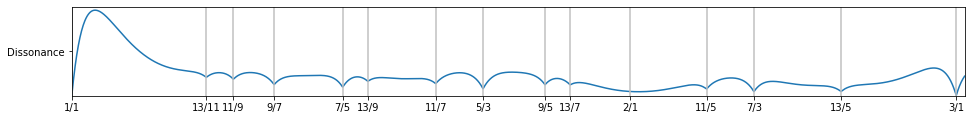

In [10]:
plot = tuningplot.TuningPlot('h', 16, 1.6)
plot.plotDissonance([1, 3, 5, 7, 9, 11, 13], 3.3)
plot.plotRatios([(1, 1), (2, 1), (3, 1), (5, 3), (7, 5), (7, 3), (9,5), (9,7), (11,7), (11,9), (11,5), (13,7), (13,9), (13,11), (13,5)])
plot.plot()

These intervals fit better with a 13 note equally divided tritave:

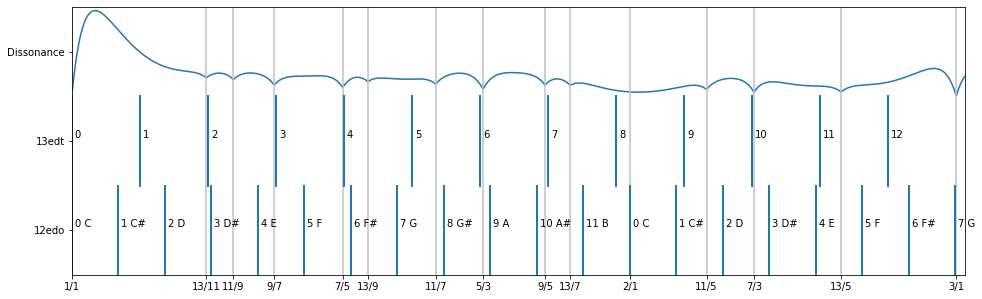

In [15]:
tuning_13edt = tuning.createEqualDivisionTuning("13edt", 13, 1.585)

plot = tuningplot.TuningPlot('h', 16, 1.6)
plot.plotDissonance([1, 3, 5, 7, 9, 11, 13], 3.3)
plot.plotRatios([(1, 1), (2, 1), (3, 1), (5, 3), (7, 5), (7, 3), (9,5), (9,7), (11,7), (11,9), (11,5), (13,7), (13,9), (13,11), (13,5)])
plot.plotTuning(tuning_13edt)
plot.plotTuning(tuning_12edo, 2)
plot.plot()

Scrap

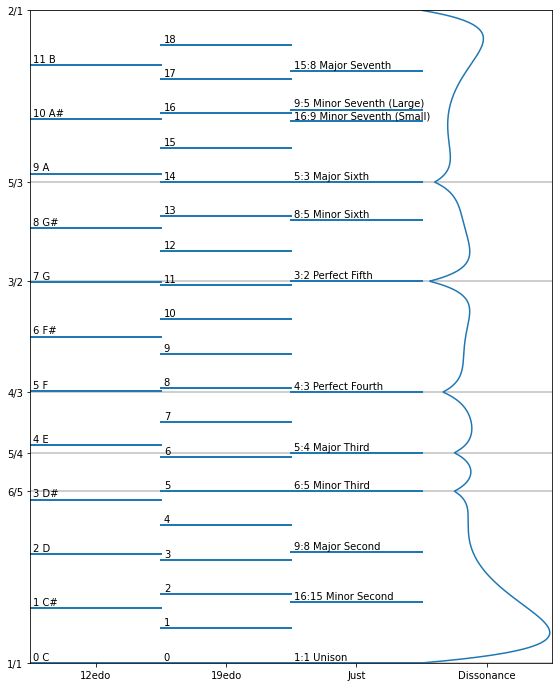

In [11]:
tuning_just = tuning.Tuning("Just", [])
tuning_just.addIntervalRatio(1, "1:1 Unison")
tuning_just.addIntervalRatio(16/15, "16:15 Minor Second")
tuning_just.addIntervalRatio(9/8, "9:8 Major Second")
tuning_just.addIntervalRatio(6/5, "6:5 Minor Third")
tuning_just.addIntervalRatio(5/4, "5:4 Major Third")
tuning_just.addIntervalRatio(4/3, "4:3 Perfect Fourth")
tuning_just.addIntervalRatio(3/2, "3:2 Perfect Fifth")
tuning_just.addIntervalRatio(8/5, "8:5 Minor Sixth")
tuning_just.addIntervalRatio(5/3, "5:3 Major Sixth")
tuning_just.addIntervalRatio(16/9, "16:9 Minor Seventh (Small)")
tuning_just.addIntervalRatio(9/5, "9:5 Minor Seventh (Large)")
tuning_just.addIntervalRatio(15/8, "15:8 Major Seventh")
tuning_12edo = tuning.createEqualDivisionTuning("12edo", 12, 1, ['0 C','1 C#','2 D','3 D#','4 E','5 F','6 F#','7 G','8 G#','9 A','10 A#','11 B'])
tuning_19edo = tuning.createEqualDivisionTuning("19edo", 19, 1)

plot = tuningplot.TuningPlot('v', 12)
plot.plotRatios([(1, 1), (6, 5), (5, 4), (4, 3), (3, 2), (5, 3), (2, 1)])
plot.plotTuning(tuning_12edo)
plot.plotTuning(tuning_19edo)
plot.plotTuning(tuning_just)
plot.plotDissonance([1, 2, 3, 4, 5, 6])
plot.plot()